In [69]:
# Dependencies
import csv
import matplotlib.pyplot as plt
import requests
import pandas as pd
api_key="26b1312ad76857438a2a51f4b895553a"

In [71]:
cities=pd.read_csv("cities2.csv")
cities.head(200)

,Country,City,Latitude,Longitude
0,ar,ushuaia,-54.800000,-68.300000
1,cl,punta arenas,-53.150000,-70.916667
2,ar,rio gallegos,-51.622613,-69.218127
3,nz,bluff,-46.600000,168.333333
4,nz,invercargill,-46.400000,168.350000
5,nz,riverton,-46.350000,168.016667
6,nz,wallacetown,-46.333333,168.266667
7,nz,dunedin,-45.866667,170.500000
8,nz,outram,-45.866667,170.233333
9,nz,ranfurly,-45.133333,170.100000


In [74]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

In [75]:
for index, row in cities.iterrows():
    lat=row["Latitude"]
    lon=row["Longitude"]
    query_url = f"{url}appid={api_key}&units={units}&lat={lat}&lon={lon}"
    
    # Get weather data
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    name=weather_json["name"]
    temp=weather_json["main"]["temp"]
    humidity=weather_json["main"]["humidity"]
    clouds=weather_json["clouds"]["all"]
    wind=weather_json["wind"]["speed"]
    
    cities.set_value(index, 'temp', temp)
    cities.set_value(index, 'humidity', humidity)
    cities.set_value(index, 'clouds', clouds)
    cities.set_value(index, 'wind', wind)
    
    print("processing city number: "+str(int(index+1)))
    print("name: "+str(name))
    print(query_url)
    
cities

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_new_instance()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


processing city number: 1
name: Ushuaia
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-54.8&lon=-68.3
processing city number: 2
name: Punta Arenas
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-53.15&lon=-70.916667
processing city number: 3
name: Rio Gallegos
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-51.622613&lon=-69.218127
processing city number: 4
name: Bluff
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-46.6&lon=168.333333
processing city number: 5
name: Invercargill
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-46.4&lon=168.35
processing city number: 6
name: Riverton
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-46.35&lon=168.01666699999

processing city number: 49
name: East London
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-33.011051&lon=27.910049
processing city number: 50
name: Gualeguaychu
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-33.009375&lon=-58.517219999999995
processing city number: 51
name: Achupallas
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-33.008055999999996&lon=-71.519722
processing city number: 52
name: San Francisco de Limache
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-32.983333&lon=-71.283333
processing city number: 53
name: Rosario
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-32.946818&lon=-60.639317000000005
processing city number: 54
name: Newcastle
http://api.openweathermap.org/data/2.5/weather?appid

processing city number: 96
name: Arivonimamo
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-19.0166667&lon=47.1833333
processing city number: 97
name: Makefu
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-19.0166667&lon=-169.91666669999998
processing city number: 98
name: Aguia Branca
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-18.983333&lon=-40.733333
processing city number: 99
name: Carmo do Paranaiba
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-18.983333&lon=-46.35
processing city number: 100
name: Ituiutaba
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-18.966667&lon=-49.466667
processing city number: 101
name: Robore
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b89

processing city number: 144
name: Barra
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-11.083333&lon=-43.166667
processing city number: 145
name: Cazaji
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-11.067147&lon=20.701483
processing city number: 146
name: Lulindi
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-10.816666699999999&lon=39.1333333
processing city number: 147
name: Namikupa
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-10.816666699999999&lon=39.65
processing city number: 148
name: Guajará Açu
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-10.8&lon=-65.3833333
processing city number: 149
name: Guajará Açu
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&uni

processing city number: 192
name: Gravata
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-8.2&lon=-35.566666999999995
processing city number: 193
name: Camabatela
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-8.18812&lon=15.37495
processing city number: 194
name: Tocache Nuevo
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-8.1841667&lon=-76.5125
processing city number: 195
name: Moche
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-8.1833333&lon=-79.0333333
processing city number: 196
name: Gondanglegi Wetan
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-8.175288&lon=112.635935
processing city number: 197
name: Jember
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&unit

processing city number: 240
name: San Miguel
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-1.7&lon=-79.0333333
processing city number: 241
name: São José
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-1.5&lon=-48.666667
processing city number: 242
name: Musoma
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-1.5&lon=33.8
processing city number: 243
name: Gahondogo
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-1.4833333&lon=29.616666700000003
processing city number: 244
name: Kismaayo
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-0.3666667&lon=42.533333299999995
processing city number: 245
name: Chuka
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=-0.

processing city number: 288
name: Mahaddayweyne
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=2.9666667&lon=45.533333299999995
processing city number: 289
name: Padilla
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=3.220376&lon=-76.313851
processing city number: 290
name: Villavieja
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=3.220523&lon=-75.218643
processing city number: 291
name: Aipe
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=3.222222&lon=-75.23666700000001
processing city number: 292
name: Saa
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=4.366666700000001&lon=11.45
processing city number: 293
name: Harper
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units

processing city number: 336
name: Santo Nino
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=6.435&lon=124.6975
processing city number: 337
name: Barbosa
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=6.438088&lon=-75.331355
processing city number: 338
name: Enugu
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=6.4402&lon=7.4943
processing city number: 339
name: Kangar
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=6.4414&lon=100.198619
processing city number: 340
name: Sirib
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=7.133333&lon=125.40722199999999
processing city number: 341
name: Chitaga
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=7.137813&lon=-72.

processing city number: 384
name: Himaya
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=10.4516&lon=122.8325
processing city number: 385
name: San Carlos
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=10.4524&lon=123.4273
processing city number: 386
name: Guadalupe
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=10.454467&lon=123.373201
processing city number: 387
name: Compostela
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=10.455&lon=124.0106
processing city number: 388
name: Candelaria
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=10.459116999999999&lon=-74.879697
processing city number: 389
name: Santiago
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&la

processing city number: 432
name: Malamig
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=12.95&lon=121.36666699999999
processing city number: 433
name: Tambong
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=12.963906&lon=121.48461599999999
processing city number: 434
name: Diffa
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=13.315555599999998&lon=12.6088889
processing city number: 435
name: Salmond
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=13.316666699999999&lon=-59.6333333
processing city number: 436
name: Basse Santa Su
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=13.316666699999999&lon=-14.2166667
processing city number: 437
name: Jiquilisco
http://api.openweathermap.org/data/2.5/weather?appid=26b131

processing city number: 479
name: Sula
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=15.233333300000002&lon=-88.58333329999999
processing city number: 480
name: La Sarrosa
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=15.233333300000002&lon=-87.83333329999999
processing city number: 481
name: La Sarrosa
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=15.233333300000002&lon=-87.85
processing city number: 482
name: Nioro Rufis
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=15.233333300000002&lon=-9.583333300000001
processing city number: 483
name: Bulualto
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=15.2372&lon=120.9558
processing city number: 484
name: Ban Na Khwai
http://api.openweathermap.org/data/2.5/weat

processing city number: 526
name: Catayuan
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=18.16358&lon=121.652752
processing city number: 527
name: Adjuntas
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=18.164722199999996&lon=-66.7225
processing city number: 528
name: Piddig
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=18.1655&lon=120.7175
processing city number: 529
name: Manthani
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=18.65&lon=79.666667
processing city number: 530
name: Tenango
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=18.65&lon=-98.18333299999999
processing city number: 531
name: San Marcos Tlacoyalco
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units

processing city number: 573
name: Telchac
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=21.2&lon=-89.266667
processing city number: 574
name: Victoria
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=21.210832999999997&lon=-100.21194399999999
processing city number: 575
name: Bhilai
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=21.216667&lon=81.43333299999999
processing city number: 576
name: Ixcatepec
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=21.216667&lon=-98.0
processing city number: 577
name: Sanchez Roman
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=21.783333&lon=-103.31666700000001
processing city number: 578
name: Santa Maria del Rio
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76

processing city number: 621
name: Bam
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=28.6535&lon=57.7646
processing city number: 622
name: Ostān-e Būshehr
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=28.6543&lon=51.38
processing city number: 623
name: Los Llanos de Aridane
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=28.658507&lon=-17.918211
processing city number: 624
name: Altamonte Springs
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=28.6608333&lon=-81.36583329999999
processing city number: 625
name: Forest City
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=28.661388899999995&lon=-81.4191667
processing city number: 626
name: Mims
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2

processing city number: 669
name: Wichita
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=37.6922222&lon=-97.33722220000001
processing city number: 670
name: Agia Paraskevi
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=38.0166667&lon=23.8333333
processing city number: 671
name: Eldersburg
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=39.403611100000006&lon=-76.9505556
processing city number: 672
name: Campo de Criptana
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=39.404637&lon=-3.123583
processing city number: 673
name: Poiares
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=40.210256&lon=-8.257464
processing city number: 674
name: Karacabey
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad768574

processing city number: 716
name: Shumikha
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=54.943889&lon=63.577778
processing city number: 717
name: Beloomut
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=54.944776&lon=39.339414
processing city number: 718
name: Kukmor
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=56.1855&lon=50.8944
processing city number: 719
name: Shemordan
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=56.1856&lon=50.3972
processing city number: 720
name: Alnashi
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=56.187378&lon=52.479185
processing city number: 721
name: Insch
http://api.openweathermap.org/data/2.5/weather?appid=26b1312ad76857438a2a51f4b895553a&units=metric&lat=57.33333299999999

,Country,City,Latitude,Longitude,temp,humidity,clouds,wind
0,ar,ushuaia,-54.800000,-68.300000,9.00,93.0,75.0,7.70
1,cl,punta arenas,-53.150000,-70.916667,12.00,87.0,90.0,4.60
2,ar,rio gallegos,-51.622613,-69.218127,17.00,67.0,40.0,2.10
3,nz,bluff,-46.600000,168.333333,13.31,100.0,64.0,13.17
4,nz,invercargill,-46.400000,168.350000,10.96,88.0,0.0,8.22
5,nz,riverton,-46.350000,168.016667,10.91,86.0,12.0,8.17
6,nz,wallacetown,-46.333333,168.266667,10.91,86.0,12.0,8.17
7,nz,dunedin,-45.866667,170.500000,15.96,53.0,36.0,5.87
8,nz,outram,-45.866667,170.233333,15.96,53.0,36.0,5.87
9,nz,ranfurly,-45.133333,170.100000,13.81,55.0,0.0,5.67


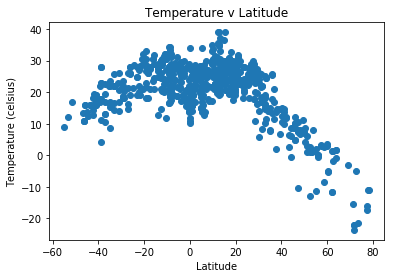

In [76]:
plt.scatter(cities["Latitude"], cities["temp"], marker="o")
plt.title("Temperature v Latitude")
plt.xlabel("Latitude")
plt.ylabel("Temperature (celsius)")

plt.show()

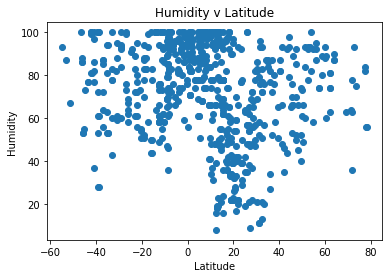

In [77]:
plt.scatter(cities["Latitude"], cities["humidity"], marker="o")
plt.title("Humidity v Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.show()

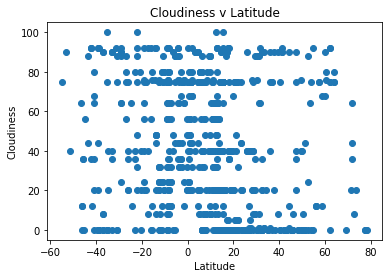

In [78]:
plt.scatter(cities["Latitude"], cities["clouds"], marker="o")
plt.title("Cloudiness v Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.show()

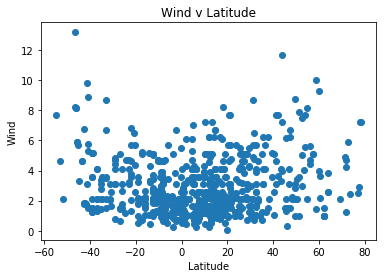

In [79]:
plt.scatter(cities["Latitude"], cities["wind"], marker="o")
plt.title("Wind v Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind")

plt.show()